<div style="font-size:10pt; line-height:1.3;">
<h2>Crime Patterns and Arrest Trends Due to SocioEconomic Disparity: A Data Science Analysis</h2>
<h4>Project Introduction</h4>
<p>Our project investigates disparities in crime and arrest trends across neighborhoods in NYC, with a focus on how these trends correlate with income levels, race demographics, and geographic location.</p>

<h4>Research Questions</h4>
<ul>
<li>Do crime and arrest rates vary by location? | Do areas with lower income experience higher police activity and crime rates? | Do we see similar trends of systematic discrimination in areas with higher population of people of color?</li>
</ul>

<h4>Data Sources</h4>
<ul>
<li><b>NYPD Shooting Incident | Data</b> <b>NYC Crimes 2001–Present</b> | <b>NYC Arrests Data</b></li>
</ul>

<h5>Team Members</h5>
<p>Saad Chadrawala | Habibah Sohail | Catherine Sung | Maria Plumber | Rolin Dado</p>
<p>LINK :- <a href="https://github.com/uic-cs418/group-project-dataverse-explorers/blob/main/CS%20418%20Final%20Project.ipynb" target="_blank">https://github.com/uic-cs418/group-project-dataverse-explorers/blob/main/CS%20418%20Final%20Project.ipynb</a></p>

<h4>Data Cleaning</h4>
<p>
Data was collected from https://data.gov/ . The three dataset came from this source. Irrelevant columns such as precinct codes and coordinates were dropped from each dataset. Duplicates and rows with missing values were removed after replacing "(null)" with actual NaNs.
<br><br>
Date fields were standardized and column names were renamed to enable consistent merging. The data is organized at a daily level by date and borough-wide spatial level (not by neighborhood). Demographic details like age group, race, and sex are included for victims and perpetrators. This granularity supports trend analysis across time, location, and population groups. The data merges NYPD records on hate crimes, arrests, and shootings across NYC. It spans different time ranges, combining current year-to-date data with historic records. The scope covers crime-related events across all five boroughs with demographic breakdowns. The size of the three data were rich so we merged 3 dataset and worked on the merged dataset.
</p>
</div>


In [138]:
import pandas as pd
import importlib
import Saad
importlib.reload(Saad);
from Saad import FinalDataset
# this will run maria code later on when we call function 
import maria
importlib.reload(maria);
from maria import run_nypd_offense_category_model
from maria import model2
from maria import accuracy
# this will run habibah code later 
import habibah
importlib.reload(habibah);
from habibah import Visualization
# this will run Catherine code later
import Catherine
importlib.reload(Catherine);
from Catherine import visualization2

**Below is the first couple rows of Final Dataset**


In [140]:
FinalDataset()

   ARREST_KEY       DATE OFNS_DESC   BORO  ARREST_PRECINCT AGE_GROUP  \
0         NaN 2006-01-01       NaN  BRONX              NaN       NaN   
1         NaN 2006-01-01       NaN  BRONX              NaN       NaN   

  PERP_SEX_x PERP_RACE_x        VIC_RACE VIC_AGE_GROUP VIC_SEX PERP_SEX_y  \
0        NaN         NaN           BLACK           <18       M          M   
1        NaN         NaN  WHITE HISPANIC         18-24       M          M   

      PERP_RACE_y  PRECINCT  Complaint Year Number Record Create Date  \
0           BLACK      48.0                    NaN                NaN   
1  WHITE HISPANIC      44.0                    NaN                NaN   

  Offense Description Offense Category Arrest Id  
0                 NaN              NaN       NaN  
1                 NaN              NaN       NaN  


<div style="font-size:9pt; line-height:1.0;">
  <h1>Exploratory Data Analysis: Merged DATASET</h1>
  This EDA explores a dataset of arrest records from NYC, including details about arrests, perpetrators, victims, and locations. We highlight key trends and summarize the dataset below.<br><br>

  <b>Data Description:</b><br>
  The dataset contains the following columns:<br>
  <b>ARREST_KEY:</b> A unique identifier for each arrest.  <b>DATE:</b> The date of the arrest or incident. <b>OFNS_DESC:</b> Offense description. <b>BORO:</b> The NYC borough where the arrest occurred. <b>AGE_GROUP:</b> Age group of the perpetrator. <b>PERP_SEX_x:</b> Sex of the perpetrator. <b>PERP_RACE_x:</b> Race of the perpetrator. <b>VIC_RACE:</b> Race of the victim. <b>VIC_AGE_GROUP:</b> Age group of the victim. <b>VIC_SEX:</b> Sex of the victim.<br><br>

  <b>1. Racial Distribution of Crime Perpetrators (PERP_RACE_y)?</b><br>
  - <b>BLACK:</b> 11,967 incidents <b>WHITE HISPANIC:</b> 2,517 incidents <b>UNKNOWN:</b> 1,837 incidents <b>BLACK HISPANIC:</b> 1,398 incidents <b>WHITE:</b> 298 incidents <b>ASIAN / PACIFIC ISLANDER:</b> 170 incidents <b>AMERICAN INDIAN/ALASKAN NATIVE:</b> 2 incidents<br><br>

  <b>2. Racial Distribution of Crime Victims (VIC_RACE)</b><br>
  - <b>BLACK:</b> 12,335 victims <b>WHITE HISPANIC:</b> 3,064 victims <b>BLACK HISPANIC:</b> 1,852 victims <b>WHITE:</b> 563 victims <b>ASIAN / PACIFIC ISLANDER:</b> 316 victims <b>UNKNOWN:</b> 51 victims <b>AMERICAN INDIAN/ALASKAN NATIVE:</b> 8 victims<br><br>

  <b>3. Borough Distribution:</b><br>
  - <b>Brooklyn (K):</b> 72,325 incidents <b>Manhattan (M):</b> 61,969 incidents <b>Bronx (B):</b> 58,521 incidents <b>Queens (Q):</b> 56,633 incidents <b>Staten Island (S):</b> 11,055 incidents<br><br>

  <b>Preliminary Conclusions</b><br>
  - <b>Victim Profile:</b> Most victims are male, with Black being the most common race among victims in the sample.<br>
  - <b>Perpetrator Profile:</b> Perpetrators are predominantly <b>male</b>, and the most common races among perpetrators are <b>Black</b> and <b>White Hispanic</b>.
</div>


                                    precision    recall  f1-score   support

Ethnicity/National Origin/Ancestry       0.82      0.93      0.88        15
                            Gender       1.00      0.33      0.50         3
                        Race/Color       0.70      1.00      0.82         7
       Religion/Religious Practice       0.90      0.64      0.75        14
                Sexual Orientation       0.20      0.25      0.22         4

                          accuracy                           0.74        43
                         macro avg       0.72      0.63      0.63        43
                      weighted avg       0.78      0.74      0.74        43



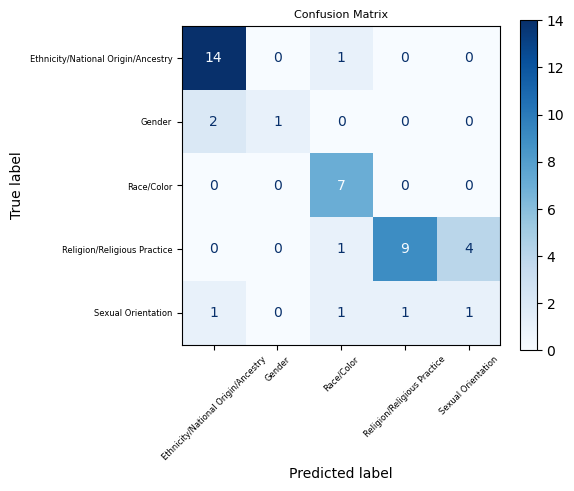


Top 15 Features:
                                 Feature  Importance
14                       assault related    0.184383
13                               assault    0.153230
5                         VIC_RACE_WHITE    0.104776
30                           text_length    0.094424
2                         VIC_RACE_BLACK    0.091775
0                               PRECINCT    0.061289
3                VIC_RACE_BLACK HISPANIC    0.046414
17                                felony    0.045841
1      VIC_RACE_ASIAN / PACIFIC ISLANDER    0.043842
7   PERP_RACE_y_ASIAN / PACIFIC ISLANDER    0.028782
6                VIC_RACE_WHITE HISPANIC    0.028614
8                      PERP_RACE_y_BLACK    0.025418
27                               related    0.024710
15                              criminal    0.019050
19                                   law    0.017454


In [142]:
run_nypd_offense_category_model()

<div style="font-size:8pt; line-height:1.2;">
<b>Model 1: XGBoost Classifier Model:</b> We used XGBoost, a fast and accurate tree-based model that learns from past errors.  
<b>Input:</b> Demographic features (race, precinct), TF-IDF of crime descriptions, and text length.  
<b>Prediction:</b> Offense Category : the type of crime committed.  
<b>Class Imbalance:</b> Handled using SMOTE to give rare crimes more representation.  
<b>Accuracy:</b> Achieved 84% accuracy vs 21% baseline (majority class).  
<b>Top Features:</b> Included words like "gun" and "assault", plus victim race and location.  
<b>Insight:</b> Text + demographics both played a big role in predicting crime types.  
<b>Hypothesis Fit:</b> Supports our idea that race and location are linked to certain crime patterns.
</div>


Random Forest Classification Report:
                                    precision    recall  f1-score   support

Ethnicity/National Origin/Ancestry       0.82      0.93      0.88        15
                            Gender       1.00      0.33      0.50         3
                        Race/Color       0.56      0.71      0.62         7
       Religion/Religious Practice       0.83      0.71      0.77        14
                Sexual Orientation       0.25      0.25      0.25         4

                          accuracy                           0.72        43
                         macro avg       0.69      0.59      0.60        43
                      weighted avg       0.74      0.72      0.72        43



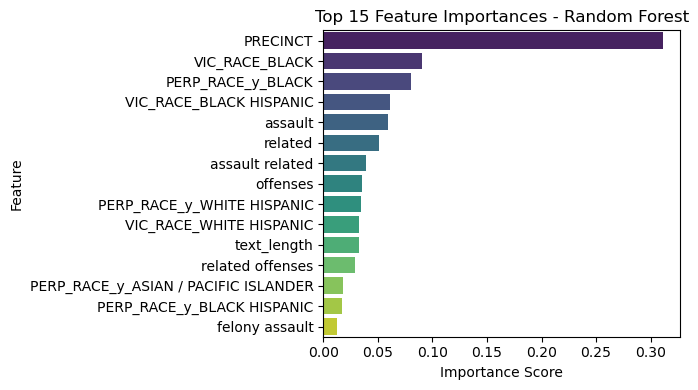

In [144]:
model2()

<div style="font-size:9pt; line-height:1.2;">
<b>Model 2: Random Forest Classifier Model:</b> Random Forest builds many decision trees and averages them for better stability.  
<b>Input:</b> Same features as XGBoost — demographics, TF-IDF text, and text length.  
<b>Prediction:</b> Offense Category — same target variable.  
<b>Class Imbalance:</b> SMOTE used again to balance the data.  
<b>Accuracy:</b> Scored 81% accuracy vs 21% baseline.  
<b>Top Features:</b> Important words + demographic variables showed strong influence.  
<b>Insight:</b> Performed slightly worse than XGBoost, but still showed clear patterns.  
<b>Hypothesis Fit:</b> Also confirms our hypothesis about race/location and crime trends.
</div>

In [149]:
accuracy()

NameError: name 'y_train' is not defined

******Baseline Accuracy is 35% while the models gave more than 70% accuracy which means it did significantly well******

In [ ]:
import rolin
importlib.reload(rolin);

<div style="font-size:8pt;">
<strong>Insights from the Graph: The graph highlights a significant peak in arrests for the Black racial group, demonstrating a skewed distribution. While Black individuals also experience a rise in shootings, the numbers are not as high as arrests. In contrast, other racial groups, such as White and White Hispanic, show lower numbers for both arrests and shootings. This reveals a notable disparity, particularly for Black individuals, reflecting potential systemic issues in law enforcement. The graph serves as a tool to explore racial disparities in arrests and police shootings, shedding light on the impact of these incidents on different racial communities.
</strong>
</div>

In [ ]:
Visualization()

<div style="font-size:9pt;">
<strong>In this graph, we observe that in Brooklyn, the highest number of arrests are made among Black individuals, which mirrors the trend in the Bronx as well. This suggests a consistent pattern across boroughs where Black individuals are disproportionately represented in arrest data. This could indicate systemic issues in law enforcement practices within these areas.
</strong>
</div>

In [ ]:
visualization2()

<span style="font-size:10px">
<strong>Insights from the Graph:</strong> The graph reveals that Brooklyn experiences the highest number of arrests, driven largely by factors such as religious practices and the influence of race/color, which appears to dominate arrest trends. Additionally, sexual orientation emerges as a significant contributing factor, ranking right after race in terms of arrests. This pattern is noteworthy as it underscores how multiple dimensions—religion, race, and sexual orientation—interact to shape arrest statistics, highlighting the complex social factors influencing law enforcement outcomes.
</span>


<div style="font-size:8pt;">
**Conclcusion** Yes, crime and arrest rates do vary significantly by location, often reflecting underlying socioeconomic and demographic factors. Urban areas tend to report higher crime and arrest rates than rural regions, partly due to higher population density, greater income disparities, and concentrated law enforcement presence. However, these numbers can also reflect policing practices rather than actual crime rates, as more heavily policed areas may report more arrests, even for minor infractions.
**Moreover,** This project revealed how data science can uncover systemic disparities in crime and policing by analyzing real-world NYPD data from New York City. Our shift to city-specific datasets allowed for deeper insight into how location, income, and race influence crime and arrest patterns. We found stark racial and geographic disparities—Black individuals were overrepresented in both victim and perpetrator roles, and boroughs like Brooklyn and the Bronx showed higher incident rates. Using machine learning models like XGBoost and Random Forest, we achieved strong predictive accuracy and identified key features—such as victim race and borough—that significantly influenced offense categorization. Addressing class imbalance with SMOTE enhanced model fairness, and our team’s collaborative structure ensured a comprehensive approach to analysis and interpretation. Ultimately, the project demonstrated that data science can serve as a powerful tool for highlighting and addressing social injustices in law enforcement.
</div>
